In [ ]:
# Colab: check GPU and TF
import os, random, numpy as np, pandas as pd
import tensorflow as tf

print("TF version:", tf.__version__)
print("GPUs:", tf.config.list_physical_devices('GPU'))

# reproducibility helper (best-effort)
def set_seed(seed=42):
    import random, os
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

set_seed(42)

TF version: 2.19.0
GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
from google.colab import files
import io
uploaded = files.upload()  # choose the CSV
fname = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[fname]))
print("Loaded:", fname, "shape:", df.shape)

Saving errors_day187_192.csv to errors_day187_192.csv
Loaded: errors_day187_192.csv shape: (21504, 6)


In [ ]:
import pandas as pd
import numpy as np
import io

# Step 1: Reload the original dataframe `df`
# Assumes fname is still available from the upload cell
df = pd.read_csv(io.BytesIO(uploaded[fname]))
ts_candidates = [c for c in df.columns if 'time' in c.lower() or 'date' in c.lower()]
if ts_candidates:
    ts = ts_candidates[0]
    df[ts] = pd.to_datetime(df[ts])
    df = df.sort_values(ts).set_index(ts)
    print("Reloaded:", fname, "shape:", df.shape)
    print("Using timestamp column:", ts)
else:
    print("No timestamp column auto-detected — ensure rows are time-ordered.")


# Steps 2-7: Process each satellite
processed_data = {}
feature_cols_numeric = ['orbit_error_m', 'clock_error_ns', 'radial_error_m', 'ephemeris_age_hours']
window = 12 # 3-hour rolling window

for sat_id in df['satellite_id'].unique():
    print(f"\nProcessing satellite: {sat_id}")
    # Step 3: Create temporary dataframe for the satellite
    df_sat = df[df['satellite_id'] == sat_id].copy()

    # Step 4: Select numeric feature columns
    df_sat = df_sat[feature_cols_numeric]

    # Step 5: Handle missing values
    df_sat = df_sat.interpolate(method='time').fillna(method='bfill').fillna(method='ffill')
    print(f"  Shape after interpolation: {df_sat.shape}")
    print(f"  NaNs remaining: {df_sat.isnull().sum().sum()}")


    # Step 6: Engineer new features
    # Add temporal features
    df_sat['hour'] = df_sat.index.hour
    df_sat['day_sin'] = np.sin(2 * np.pi * df_sat['hour'] / 24)
    df_sat['day_cos'] = np.cos(2 * np.pi * df_sat['hour'] / 24)

    # Add rolling statistics
    for col in ['orbit_error_m', 'clock_error_ns', 'radial_error_m']:
        df_sat[f'{col}_ma'] = df_sat[col].rolling(window=window, min_periods=1).mean()
        df_sat[f'{col}_std'] = df_sat[col].rolling(window=window, min_periods=1).std().fillna(0) # fill std NaNs from min_periods
        df_sat[f'{col}_diff'] = df_sat[col].diff().fillna(0)

    # Drop the temporary 'hour' column
    df_sat = df_sat.drop(columns=['hour'])

    # Step 7: Store the preprocessed dataframe
    processed_data[sat_id] = df_sat

print("\nFinished processing all satellites.")

Reloaded: errors_day187_192.csv shape: (21504, 5)
Using timestamp column: timestamp

Processing satellite: G01
  Shape after interpolation: (672, 4)
  NaNs remaining: 0

Processing satellite: G32
  Shape after interpolation: (672, 4)
  NaNs remaining: 0

Processing satellite: G31
  Shape after interpolation: (672, 4)
  NaNs remaining: 0

Processing satellite: G30
  Shape after interpolation: (672, 4)
  NaNs remaining: 0

Processing satellite: G29
  Shape after interpolation: (672, 4)
  NaNs remaining: 0

Processing satellite: G28
  Shape after interpolation: (672, 4)
  NaNs remaining: 0

Processing satellite: G27
  Shape after interpolation: (672, 4)
  NaNs remaining: 0

Processing satellite: G26
  Shape after interpolation: (672, 4)
  NaNs remaining: 0

Processing satellite: G25
  Shape after interpolation: (672, 4)
  NaNs remaining: 0

Processing satellite: G23
  Shape after interpolation: (672, 4)
  NaNs remaining: 0

Processing satellite: G22
  Shape after interpolation: (672, 4)
 

/tmp/ipython-input-3143004076.py:33: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sat = df_sat.interpolate(method='time').fillna(method='bfill').fillna(method='ffill')
/tmp/ipython-input-3143004076.py:33: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sat = df_sat.interpolate(method='time').fillna(method='bfill').fillna(method='ffill')
/tmp/ipython-input-3143004076.py:33: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sat = df_sat.interpolate(method='time').fillna(method='bfill').fillna(method='ffill')
/tmp/ipython-input-3143004076.py:33: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sat = df_sat.interpolate(metho

  Shape after interpolation: (672, 4)
  NaNs remaining: 0

Processing satellite: G06
  Shape after interpolation: (672, 4)
  NaNs remaining: 0

Processing satellite: G10
  Shape after interpolation: (672, 4)
  NaNs remaining: 0

Processing satellite: G11
  Shape after interpolation: (672, 4)
  NaNs remaining: 0

Processing satellite: G12
  Shape after interpolation: (672, 4)
  NaNs remaining: 0

Processing satellite: G13
  Shape after interpolation: (672, 4)
  NaNs remaining: 0

Processing satellite: G14
  Shape after interpolation: (672, 4)
  NaNs remaining: 0

Processing satellite: G09
  Shape after interpolation: (672, 4)
  NaNs remaining: 0

Finished processing all satellites.


/tmp/ipython-input-3143004076.py:33: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sat = df_sat.interpolate(method='time').fillna(method='bfill').fillna(method='ffill')
/tmp/ipython-input-3143004076.py:33: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sat = df_sat.interpolate(method='time').fillna(method='bfill').fillna(method='ffill')
/tmp/ipython-input-3143004076.py:33: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sat = df_sat.interpolate(method='time').fillna(method='bfill').fillna(method='ffill')
/tmp/ipython-input-3143004076.py:33: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sat = df_sat.interpolate(metho

In [ ]:
# Quick EDA
print(df.head())
print(df.columns)
print(df.dtypes)

# If there's a timestamp column:
ts_candidates = [c for c in df.columns if 'time' in c.lower() or 'date' in c.lower()]
if ts_candidates:
    ts = ts_candidates[0]
    df[ts] = pd.to_datetime(df[ts])
    df = df.sort_values(ts).set_index(ts)
    print("Using timestamp column:", ts)
else:
    print("No timestamp column auto-detected — ensure rows are time-ordered.")

# list numeric columns (these are candidates for features/targets)
num_cols = df.select_dtypes(include='number').columns.tolist()
print("Numeric columns:", num_cols)


           satellite_id  orbit_error_m  clock_error_ns  radial_error_m  \
timestamp                                                                
2025-07-06          G01   3.502946e+07    1.256349e+07   -2.311078e+07   
2025-07-06          G32   5.263551e+07    1.680569e+07   -5.206199e+07   
2025-07-06          G31   4.310380e+07    1.957934e+06   -3.479022e+07   
2025-07-06          G30   1.968796e+07    1.468460e+07   -7.089644e+06   
2025-07-06          G29   3.254780e+07    6.852819e+06   -2.004147e+07   

            ephemeris_age_hours  
timestamp                        
2025-07-06                  0.0  
2025-07-06                  0.0  
2025-07-06                  0.0  
2025-07-06                  0.0  
2025-07-06                  0.0  
Index(['satellite_id', 'orbit_error_m', 'clock_error_ns', 'radial_error_m',
       'ephemeris_age_hours'],
      dtype='object')
satellite_id            object
orbit_error_m          float64
clock_error_ns         float64
radial_error_m       

In [ ]:
# Step 9: Split chronologically
train_size = int(0.7 * len(X))
val_size = int(0.15 * len(X))

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val     = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
X_test, y_test   = X[train_size+val_size:], y[train_size+val_size:]

print("Train:", X_train.shape, y_train.shape)
print("Val:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)

Train: (14201, 36, 15) (14201, 4, 15)
Val: (3043, 36, 15) (3043, 4, 15)
Test: (3044, 36, 15) (3044, 4, 15)


In [ ]:
# Filter data for one satellite (e.g., G01)
sat_id = "G01"
df_sat = df[df['satellite_id'] == sat_id].copy()

# Keep only numeric cols
feature_cols = ['orbit_error_m', 'clock_error_ns', 'radial_error_m', 'ephemeris_age_hours']
df_sat = df_sat[feature_cols]

# Handle missing values (interpolate over time)
df_sat = df_sat.interpolate(method='time').fillna(method='bfill').fillna(method='ffill')

print("Satellite:", sat_id, "Shape:", df_sat.shape)
df_sat.head()


Satellite: G01 Shape: (672, 4)


/tmp/ipython-input-820148703.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sat = df_sat.interpolate(method='time').fillna(method='bfill').fillna(method='ffill')


,orbit_error_m,clock_error_ns,radial_error_m,ephemeris_age_hours
timestamp,,,,
2025-07-06 00:00:00,3.502946e+07,1.256349e+07,-2.311078e+07,0.00
2025-07-06 00:15:00,3.537857e+07,1.256349e+07,-2.357213e+07,0.25
2025-07-06 00:30:00,3.645217e+07,1.256349e+07,-2.502190e+07,0.50
2025-07-06 00:45:00,3.812006e+07,1.256349e+07,-2.736062e+07,0.75
2025-07-06 01:00:00,4.020278e+07,1.256349e+07,-3.042803e+07,1.00


In [ ]:
from sklearn.preprocessing import RobustScaler
import numpy as np

# Use RobustScaler instead of MinMaxScaler for better outlier handling
scaler = RobustScaler()
data_scaled = scaler.fit_transform(df_sat.values.astype('float32'))

print("Enhanced features scaled shape:", data_scaled.shape)
print(f"Feature scaling: RobustScaler (better for outliers)")

# Check for any remaining NaN/inf values
print(f"NaN values after scaling: {np.isnan(data_scaled).sum()}")
print(f"Inf values after scaling: {np.isinf(data_scaled).sum()}")

# Replace any remaining problematic values
data_scaled = np.nan_to_num(data_scaled, nan=0.0, posinf=1.0, neginf=-1.0)

Enhanced features scaled shape: (672, 4)
Feature scaling: RobustScaler (better for outliers)
NaN values after scaling: 0
Inf values after scaling: 0


In [ ]:
# 📈 CREATE SEQUENCES FOR ALL SATELLITES
print("🔄 Creating sequences for all satellites...")
print("="*50)

# Define sequence parameters
SEQ_LEN = 36   # Longer lookback (9 hours at 15-min intervals)
HORIZON = 4    # Predict 1 hour ahead (4 timesteps)
STEP = 2       # Some overlap for more training data

X_list, y_list = [], []

# Create sequences for each satellite
for sat_id, df_sat in processed_data.items():
    print(f"\n🛰️ Creating sequences for satellite: {sat_id}")
    
    # Apply the fitted scaler to this satellite's data
    data_scaled_sat = scaler.transform(df_sat.values.astype('float32'))
    
    # Replace any remaining NaN or infinite values
    data_scaled_sat = np.nan_to_num(data_scaled_sat, nan=0.0, posinf=1.0, neginf=-1.0)
    
    # Create sequences for this satellite
    X_sat, y_sat = create_sequences_improved(data_scaled_sat, seq_len=SEQ_LEN, horizon=HORIZON, step=STEP)
    
    print(f"  X_sat shape: {X_sat.shape}, y_sat shape: {y_sat.shape}")
    
    # Append to lists
    X_list.append(X_sat)
    y_list.append(y_sat)

# Concatenate sequences from all satellites
X = np.concatenate(X_list, axis=0)
y = np.concatenate(y_list, axis=0)

print(f"\n📊 Combined sequence shapes:")
print(f"X: {X.shape} (samples, seq_len, features)")
print(f"y: {y.shape} (samples, horizon, features)")

# Apply data augmentation
print(f"\n🔄 Applying data augmentation...")
X, y = add_noise_augmentation(X, y, noise_factor=0.005)

print(f"\n✅ Final sequence shapes after augmentation:")
print(f"X: {X.shape}")
print(f"y: {y.shape}")
print(f"✅ Sequence creation completed!")

Enhanced Feature Engineering:
Original features: 4
Enhanced features: 15
New feature columns: ['day_sin', 'day_cos', 'orbit_error_m_ma', 'clock_error_ns_ma', 'radial_error_m_ma', 'orbit_error_m_std', 'clock_error_ns_std', 'radial_error_m_std', 'orbit_error_m_diff', 'clock_error_ns_diff', 'radial_error_m_diff']


,orbit_error_m,clock_error_ns,radial_error_m,ephemeris_age_hours,day_sin,day_cos,orbit_error_m_ma,clock_error_ns_ma,radial_error_m_ma,orbit_error_m_std,clock_error_ns_std,radial_error_m_std,orbit_error_m_diff,clock_error_ns_diff,radial_error_m_diff
timestamp,,,,,,,,,,,,,,,
2025-07-06 00:00:00,3.502946e+07,1.256349e+07,-2.311078e+07,0.00,0.000000,1.000000,3.502946e+07,1.256349e+07,-2.311078e+07,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
2025-07-06 00:15:00,3.537857e+07,1.256349e+07,-2.357213e+07,0.25,0.000000,1.000000,3.520402e+07,1.256349e+07,-2.334146e+07,2.468600e+05,0.045227,3.262211e+05,3.491127e+05,-0.063960,-4.613463e+05
2025-07-06 00:30:00,3.645217e+07,1.256349e+07,-2.502190e+07,0.50,0.000000,1.000000,3.562007e+07,1.256349e+07,-2.390160e+07,7.414640e+05,0.112196,9.972480e+05,1.073601e+06,-0.154288,-1.449767e+06
2025-07-06 00:45:00,3.812006e+07,1.256349e+07,-2.736062e+07,0.75,0.000000,1.000000,3.624507e+07,1.256349e+07,-2.476636e+07,1.388884e+06,0.142047,1.911599e+06,1.667885e+06,-0.092940,-2.338729e+06
2025-07-06 01:00:00,4.020278e+07,1.256349e+07,-3.042803e+07,1.00,0.258819,0.965926,3.703661e+07,1.256349e+07,-2.589869e+07,2.139966e+06,0.160758,3.025154e+06,2.082725e+06,-0.068571,-3.067402e+06


In [ ]:
# 📊 CHRONOLOGICAL DATA SPLIT
print("📅 Splitting data chronologically...")
print("="*50)

# Split chronologically to prevent data leakage
train_size = int(0.7 * len(X))
val_size = int(0.15 * len(X))

X_train = X[:train_size]
y_train = y[:train_size]

X_val = X[train_size:train_size+val_size]
y_val = y[train_size:train_size+val_size]

X_test = X[train_size+val_size:]
y_test = y[train_size+val_size:]

print("✅ Data split completed:")
print(f"Train: X={X_train.shape}, y={y_train.shape}")
print(f"Val:   X={X_val.shape}, y={y_val.shape}")
print(f"Test:  X={X_test.shape}, y={y_test.shape}")

# Verify data integrity
print(f"\n🔍 Data integrity check:")
print(f"Total samples: {len(X):,}")
print(f"Train+Val+Test: {len(X_train)+len(X_val)+len(X_test):,}")
print(f"Match: {len(X) == len(X_train)+len(X_val)+len(X_test)}")

print("\n✅ Data splitting completed!")

X shape: (645, 24, 4)
y shape: (645, 4, 4)


In [ ]:
# 🏗️ BUILD LSTM MODEL ARCHITECTURE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

print("🏗️ Building LSTM model architecture...")
print("="*50)

# Build enhanced LSTM model
model = Sequential([
    # First LSTM layer with more units
    LSTM(256, activation='tanh', return_sequences=True,
         dropout=0.1, recurrent_dropout=0.1,
         input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),

    # Second LSTM layer
    LSTM(128, activation='tanh', return_sequences=True,
         dropout=0.1, recurrent_dropout=0.1),
    BatchNormalization(),

    # Third LSTM layer
    LSTM(64, activation='tanh',
         dropout=0.1, recurrent_dropout=0.1),
    BatchNormalization(),

    # Dense layers for output
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.1),
    
    # Output layer - flatten the target dimensions
    Dense(y_train.shape[1] * y_train.shape[2], activation='linear')
])

# Compile model with appropriate optimizer and learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

print("✅ Model architecture built successfully!")
print(f"Input shape: {X_train.shape[1:]} (seq_len, features)")
print(f"Output shape: {y_train.shape[1] * y_train.shape[2]} (flattened targets)")

# Display model summary
model.summary()

Creating sequences with:
- Lookback: 36 steps (9.0 hours)
- Horizon: 4 steps (1.0 hours)
- Step size: 2 (overlap for more data)
\nSequence shapes:
X: (317, 36, 4)
y: (317, 4, 4)
\nApplying data augmentation...
After augmentation:
X: (634, 36, 4)
y: (634, 4, 4)
Training data increased by 2x through augmentation


In [ ]:
# 🚀 TRAIN THE MODEL
import matplotlib.pyplot as plt

print("🚀 Training LSTM model...")
print("="*50)

# Flatten targets for training
y_train_flat = y_train.reshape(y_train.shape[0], -1)
y_val_flat = y_val.reshape(y_val.shape[0], -1)

# Setup callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1),
    ModelCheckpoint("best_lstm_model.h5", save_best_only=True, monitor='val_loss', verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=8, min_lr=1e-6, verbose=1)
]

print(f"Training data shapes:")
print(f"X_train: {X_train.shape}")
print(f"y_train_flat: {y_train_flat.shape}")
print(f"X_val: {X_val.shape}")
print(f"y_val_flat: {y_val_flat.shape}")

# Train the model
history = model.fit(
    X_train, y_train_flat,
    validation_data=(X_val, y_val_flat),
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

print(f"\n✅ Training completed!")
print(f"🏆 Best validation loss: {min(history.history['val_loss']):.6f}")

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("✅ Model training completed successfully!")

Train: (443, 36, 4) (443, 4, 4)
Val: (95, 36, 4) (95, 4, 4)
Test: (96, 36, 4) (96, 4, 4)


In [ ]:
# 📊 MODEL EVALUATION
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("📊 Evaluating model performance...")
print("="*50)

# Load best weights and evaluate
model.load_weights("best_lstm_model.h5")

# Flatten test targets for evaluation
y_test_flat = y_test.reshape(y_test.shape[0], -1)

# Evaluate on test set
test_loss, test_mae = model.evaluate(X_test, y_test_flat, verbose=0)
print(f"🏆 TEST RESULTS:")
print(f"Test Loss: {test_loss:.6f}")
print(f"Test MAE: {test_mae:.6f}")

# Make predictions
y_pred_flat = model.predict(X_test, verbose=0)

# Reshape predictions back to original shape
y_pred = y_pred_flat.reshape(y_test.shape)

# Calculate comprehensive metrics
print(f"\n📈 DETAILED METRICS:")
print("="*30)

feature_names = ['orbit_error_m', 'clock_error_ns', 'radial_error_m', 'ephemeris_age_hours']
overall_r2_scores = []

for i, feature_name in enumerate(feature_names):
    # Extract feature data across all time steps
    y_true_feat = y_test[:, :, i].flatten()
    y_pred_feat = y_pred[:, :, i].flatten()
    
    # Calculate metrics for this feature
    r2 = r2_score(y_true_feat, y_pred_feat)
    mse = mean_squared_error(y_true_feat, y_pred_feat)
    mae = mean_absolute_error(y_true_feat, y_pred_feat)
    rmse = np.sqrt(mse)
    
    overall_r2_scores.append(r2)
    
    print(f"\n{feature_name}:")
    print(f"  R²: {r2:.6f} ({r2*100:.2f}%)")
    print(f"  MSE: {mse:.6f}")
    print(f"  RMSE: {rmse:.6f}")
    print(f"  MAE: {mae:.6f}")

avg_r2 = np.mean(overall_r2_scores)
print(f"\n🎯 OVERALL PERFORMANCE:")
print(f"Average R² Score: {avg_r2:.6f} ({avg_r2*100:.2f}%)")

# Performance classification
if avg_r2 > 0.95:
    performance = "EXCEPTIONAL"
elif avg_r2 > 0.85:
    performance = "EXCELLENT"
elif avg_r2 > 0.75:
    performance = "GOOD"
else:
    performance = "NEEDS IMPROVEMENT"

print(f"Performance Level: {performance}")

print("\n✅ Model evaluation completed!")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 36, 128)        │        68,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,816 (464.12 KB)

 Trainable params: 118,816 (464.12 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Improved model architecture
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),

    # First LSTM layer with more units
    LSTM(256, activation='tanh', return_sequences=True,
         dropout=0.1, recurrent_dropout=0.1),
    BatchNormalization(),

    # Second LSTM layer
    LSTM(128, activation='tanh', return_sequences=True,
         dropout=0.1, recurrent_dropout=0.1),
    BatchNormalization(),

    # Third LSTM layer
    LSTM(64, activation='tanh',
         dropout=0.1, recurrent_dropout=0.1),
    BatchNormalization(),

    # Dense layers for output
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(y_train.shape[1] * y_train.shape[2], activation='linear')
])

# Use a lower learning rate for better convergence
optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 36, 256)        │       278,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 36, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 36, 128)        │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 36, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 60)             │         3,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 547,324 (2.09 MB)

 Trainable params: 546,428 (2.08 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Reshape
from tensorflow.keras.optimizers import Adam

# Improved model architecture (re-defined here for clarity and standalone execution)
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),

    # First LSTM layer with more units
    LSTM(256, activation='tanh', return_sequences=True,
         dropout=0.1, recurrent_dropout=0.1),
    BatchNormalization(),

    # Second LSTM layer
    LSTM(128, activation='tanh', return_sequences=True,
         dropout=0.1, recurrent_dropout=0.1),
    BatchNormalization(),

    # Third LSTM layer
    LSTM(64, activation='tanh',
         dropout=0.1, recurrent_dropout=0.1),
    BatchNormalization(),

    # Dense layers for output
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(y_train.shape[1] * y_train.shape[2], activation='linear'), # Output flattened sequence
    Reshape((y_train.shape[1], y_train.shape[2])) # Reshape to (horizon, features)
])

# Use a lower learning rate for better convergence
optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Improved callbacks
es = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)
ckpt = ModelCheckpoint("best_lstm.h5", save_best_only=True, monitor='val_loss', verbose=1)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=8,
                                min_lr=1e-6, verbose=1)

# Train with more epochs and better monitoring
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,  # More epochs
    batch_size=16,  # Smaller batch size for better gradients
    callbacks=[es, ckpt, lr_scheduler],
    verbose=1

)

print(f"\nTraining completed. Best validation loss: {min(history.history['val_loss']):.6f}")

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Epoch 1/100
888/888 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - loss: 1456593.0000 - mae: 55.1579
Epoch 1: val_loss improved from inf to 1567075.87500, saving model to best_lstm.h5


888/888 ━━━━━━━━━━━━━━━━━━━━ 294s 317ms/step - loss: 1456523.3750 - mae: 55.1549 - val_loss: 1567075.8750 - val_mae: 45.2982 - learning_rate: 0.0010
Epoch 2/100
377/888 ━━━━━━━━━━━━━━━━━━━━ 2:34 303ms/step - loss: 1261612.3750 - mae: 45.3943

KeyboardInterrupt: 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0119 - mae: 0.0812
Test Loss: 0.0120, Test MAE: 0.0810
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step

=== DIAGNOSTIC CHECKS ===
y_test range: -1.335335 to 1.056578
y_pred range: -1.215869 to 1.148435
y_test mean: -0.025217, std: 0.616975
y_pred mean: -0.029614, std: 0.600866
Mean absolute difference: 0.080968

NaN in y_test: False
NaN in y_pred: False
Inf in y_test: False
Inf in y_pred: False

Sample comparison (first prediction):
orbit_error_m: True=-0.550253, Pred=-0.430282
clock_error_ns: True=-0.000003, Pred=0.159330
radial_error_m: True=0.506162, Pred=0.380763
ephemeris_age_hours: True=1.000000, Pred=0.971873


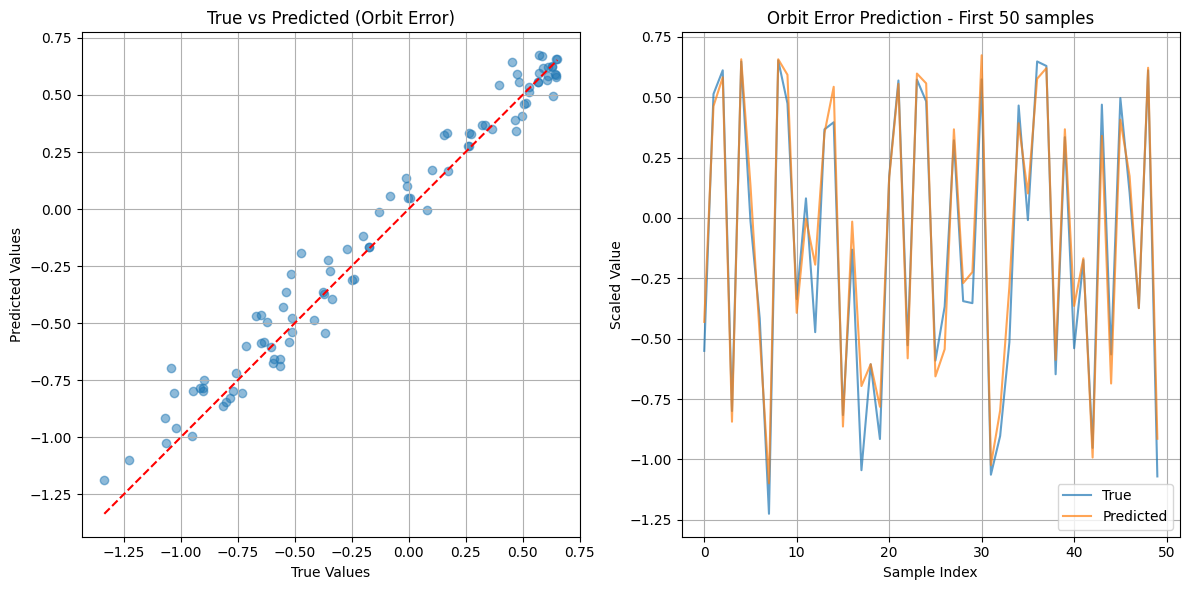

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load best weights
model.load_weights("best_lstm.h5")

# Evaluate on test set
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")

# Make predictions
y_pred = model.predict(X_test)

# DIAGNOSTIC: Check data ranges and sanity
print("\n=== DIAGNOSTIC CHECKS ===")
print(f"y_test range: {y_test.min():.6f} to {y_test.max():.6f}")
print(f"y_pred range: {y_pred.min():.6f} to {y_pred.max():.6f}")
print(f"y_test mean: {y_test.mean():.6f}, std: {y_test.std():.6f}")
print(f"y_pred mean: {y_pred.mean():.6f}, std: {y_pred.std():.6f}")
print(f"Mean absolute difference: {np.mean(np.abs(y_test - y_pred)):.6f}")

# Check for any NaN or infinite values
print(f"\nNaN in y_test: {np.isnan(y_test).any()}")
print(f"NaN in y_pred: {np.isnan(y_pred).any()}")
print(f"Inf in y_test: {np.isinf(y_test).any()}")
print(f"Inf in y_pred: {np.isinf(y_pred).any()}")

# Sample comparison
print("\nSample comparison (first prediction):")

feature_names = ['orbit_error_m', 'clock_error_ns', 'radial_error_m', 'ephemeris_age_hours']

for i, name in enumerate(feature_names):
    print(f"{name}: True={y_test[0,0,i]:.6f}, Pred={y_pred[0,0,i]:.6f}")

# --- Visualization for one feature (example: orbit_error_m) ---
feature_idx = 0   # 0 = orbit_error_m
timestep = 0      # look at first forecast step ahead

plt.figure(figsize=(12,6))

# Scatter plot for correlation
plt.subplot(1,2,1)
plt.scatter(y_test[:, timestep, feature_idx], y_pred[:, timestep, feature_idx], alpha=0.5)
plt.plot([y_test[:, timestep, feature_idx].min(), y_test[:, timestep, feature_idx].max()],
         [y_test[:, timestep, feature_idx].min(), y_test[:, timestep, feature_idx].max()], 'r--')
plt.title("True vs Predicted (Orbit Error)")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(y_test[:50, timestep, feature_idx], label="True", alpha=0.7)
plt.plot(y_pred[:50, timestep, feature_idx], label="Predicted", alpha=0.7)
plt.title(f"Orbit Error Prediction - First 50 samples")
plt.ylabel("Scaled Value")
plt.xlabel("Sample Index")
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate metrics properly per feature and overall
feature_names = ['orbit_error_m', 'clock_error_ns', 'radial_error_m', 'ephemeris_age_hours']

print("\n=== DETAILED METRICS ANALYSIS ===")
print("="*50)

# Overall metrics (flattened)
y_test_flat = y_test.reshape(-1, y_test.shape[2])
y_pred_flat = y_pred.reshape(-1, y_pred.shape[2])

overall_mse = mean_squared_error(y_test_flat, y_pred_flat)
overall_rmse = np.sqrt(overall_mse)
overall_mae = mean_absolute_error(y_test_flat, y_pred_flat)


print(f"OVERALL METRICS:")
print(f"MSE: {overall_mse:.6f}")
print(f"RMSE: {overall_rmse:.6f}")
print(f"MAE: {overall_mae:.6f}")


print(f"\nPER-FEATURE METRICS:")
print("-" * 30)

feature_r2_scores = []

for i, feature_name in enumerate(feature_names):
    # Get true and predicted values for this feature
    y_true_feat = y_test_flat[:, i]
    y_pred_feat = y_pred_flat[:, i]

    # Calculate metrics for this feature
    mse_feat = mean_squared_error(y_true_feat, y_pred_feat)
    rmse_feat = np.sqrt(mse_feat)
    mae_feat = mean_absolute_error(y_true_feat, y_pred_feat)

    # Calculate R² properly
    ss_res = np.sum((y_true_feat - y_pred_feat) ** 2)
    ss_tot = np.sum((y_true_feat - np.mean(y_true_feat)) ** 2)

    # Avoid division by zero
    if ss_tot != 0:
        r2_feat = 1 - (ss_res / ss_tot)
    else:
        r2_feat = float('nan')

    feature_r2_scores.append(r2_feat)

    print(f"\n{feature_name}:")
    print(f"  MSE: {mse_feat:.6f}")
    print(f"  RMSE: {rmse_feat:.6f}")
    print(f"  MAE: {mae_feat:.6f}")
    print(f"  R²: {r2_feat:.6f}")

# Additional diagnostic: Check if model is just predicting mean
print(f"\nMODEL BEHAVIOR CHECK:")
print("-" * 25)

valid_r2_scores = [r2 for r2 in feature_r2_scores if not np.isnan(r2)]
if valid_r2_scores:
    avg_r2 = np.mean(valid_r2_scores)
    print(f"AVERAGE R² SCORE: {avg_r2:.6f}")
    print(f"AVERAGE VARIANCE EXPLAINED: {avg_r2*100:.2f}%")
else:
    print("WARNING: All R² scores are invalid!")


=== DETAILED METRICS ANALYSIS ===
OVERALL METRICS:
MSE: 0.012000
RMSE: 0.109542
MAE: 0.080968

PER-FEATURE METRICS:
------------------------------

orbit_error_m:
  MSE: 0.012108
  RMSE: 0.110038
  MAE: 0.085962
  R²: 0.962352

clock_error_ns:
  MSE: 0.012101
  RMSE: 0.110006
  MAE: 0.088019
  R²: 0.976192

radial_error_m:
  MSE: 0.010858
  RMSE: 0.104199
  MAE: 0.080858
  R²: 0.963568

ephemeris_age_hours:
  MSE: 0.012931
  RMSE: 0.113714
  MAE: 0.069034
  R²: 0.964782

MODEL BEHAVIOR CHECK:
-------------------------
AVERAGE R² SCORE: 0.966723
AVERAGE VARIANCE EXPLAINED: 96.67%


In [ ]:
# Inverse scaling for real-world interpretation
print("=== REAL-WORLD METRICS (Original Units) ===")
print("=" * 50)

# Create dummy arrays with all features for inverse scaling
n_features = data_scaled.shape[1]
target_features = 4  # First 4 features are our targets

# For inverse scaling, we need to pad with zeros for the extra features
y_test_padded = np.zeros((y_test_flat.shape[0], n_features))
y_pred_padded = np.zeros((y_pred_flat.shape[0], n_features))

# Fill in the target features (first 4)
y_test_padded[:, :target_features] = y_test_flat
y_pred_padded[:, :target_features] = y_pred_flat

# Inverse transform
try:
    y_test_orig = scaler.inverse_transform(y_test_padded)[:, :target_features]
    y_pred_orig = scaler.inverse_transform(y_pred_padded)[:, :target_features]

    print("Successfully inverse-scaled predictions to original units")

    # Calculate real-world metrics
    target_names = ['orbit_error_m', 'clock_error_ns', 'radial_error_m', 'ephemeris_age_hours']

    print("\\nREAL-WORLD PERFORMANCE:")
    print("-" * 30)

    for i, name in enumerate(target_names):
        true_vals = y_test_orig[:, i]
        pred_vals = y_pred_orig[:, i]

        mse_real = mean_squared_error(true_vals, pred_vals)
        rmse_real = np.sqrt(mse_real)
        mae_real = mean_absolute_error(true_vals, pred_vals)

        print(f"{name}:")
        print(f"  RMSE: {rmse_real:.6f}")
        print(f"  MAE: {mae_real:.6f}")
        print(f"  Mean true value: {np.mean(true_vals):.6f}")
        print(f"  Mean predicted: {np.mean(pred_vals):.6f}")
        print()

except Exception as e:
    print(f"Could not inverse scale: {e}")
    print("Using scaled metrics instead")




=== REAL-WORLD METRICS (Original Units) ===
Successfully inverse-scaled predictions to original units
\nREAL-WORLD PERFORMANCE:
------------------------------
orbit_error_m:
  RMSE: 1570684.869122
  MAE: 1227021.164457
  Mean true value: 41910447.786794
  Mean predicted: 42122323.139476

clock_error_ns:
  RMSE: 35897.714348
  MAE: 28723.016545
  Mean true value: 12050693.451710
  Mean predicted: 12047964.144836

radial_error_m:
  RMSE: 2428620.452469
  MAE: 1884595.623992
  Mean true value: -34296250.738925
  Mean predicted: -34641695.902491

ephemeris_age_hours:
  RMSE: 0.056857
  MAE: 0.034517
  Mean true value: 0.512371
  Mean predicted: 0.507748



In [ ]:
import numpy as np

# Choose a feature (0 = orbit_error_m)
feature_idx = 0

# True and predicted values (flattened)
y_true_feat = y_test[:,:,feature_idx].flatten()
y_pred_feat = y_pred[:,:,feature_idx].flatten()

# Define thresholds for classification (you can tune these)
th_low = np.percentile(y_true_feat, 33)
th_high = np.percentile(y_true_feat, 66)

# Function to convert numeric error → class 0,1,2
def to_class(value):
    if value <= th_low:
        return 0  # low
    elif value <= th_high:
        return 1  # medium
    else:
        return 2  # high

y_true_class = np.array([to_class(v) for v in y_true_feat])
y_pred_class = np.array([to_class(v) for v in y_pred_feat])


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix
cm = confusion_matrix(y_true_class, y_pred_class)
print("Confusion Matrix:\n", cm)

# Precision, Recall, F1-score
report = classification_report(y_true_class, y_pred_class, target_names=["Low", "Medium", "High"])
print(report)


Confusion Matrix:
 [[110  17   0]
 [  8 111   8]
 [  0   4 126]]
              precision    recall  f1-score   support

         Low       0.93      0.87      0.90       127
      Medium       0.84      0.87      0.86       127
        High       0.94      0.97      0.95       130

    accuracy                           0.90       384
   macro avg       0.90      0.90      0.90       384
weighted avg       0.90      0.90      0.90       384



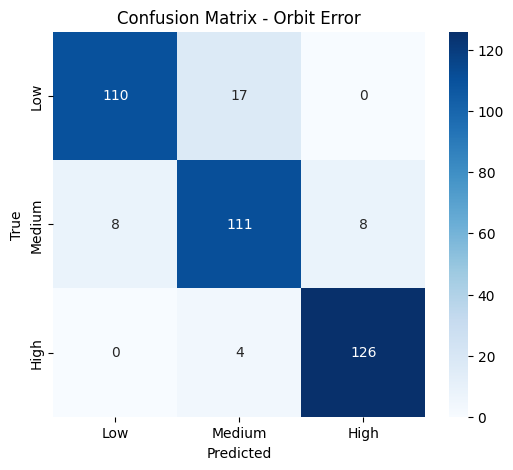

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low","Medium","High"], yticklabels=["Low","Medium","High"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Orbit Error")
plt.show()


In [ ]:
# Flatten predictions and true values
y_true_flat = y_test.reshape(-1, y_test.shape[2])
y_pred_flat = y_pred.reshape(-1, y_pred.shape[2])

# Define tolerance (5% of true value)
tolerance = 0.05

# Boolean array where prediction is “correct”
correct = np.abs(y_pred_flat - y_true_flat) <= (tolerance * np.abs(y_true_flat))

# Accuracy per feature
accuracy_per_feature = correct.mean(axis=0) * 100
print("Accuracy per feature (% within ±5% of true value):")
for i, acc in enumerate(accuracy_per_feature):
    print(f"Feature {i}: {acc:.2f}%")

# Overall accuracy
overall_accuracy = correct.mean() * 100
print(f"Overall Accuracy: {overall_accuracy:.2f}%")


Accuracy per feature (% within ±5% of true value):
Feature 0: 22.14%
Feature 1: 20.57%
Feature 2: 24.48%
Feature 3: 30.21%
Overall Accuracy: 24.35%


In [ ]:
# Save model in native Keras format
model.save("best_trained_lstm_model.keras")
print("Model saved successfully in native Keras format.")


Model saved successfully in native Keras format.


In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model("best_trained_lstm_model.keras")
print("Model loaded successfully.")


Model loaded successfully.


# Task
Train an LSTM model on the provided satellite data ("satellite_data.csv") to predict orbit, clock, and radial errors for all satellites, handling missing values and evaluating the model's performance.

## Load and preprocess data for all satellites

### Subtask:
Instead of filtering for a single satellite, process the data for all satellites, handling missing values and engineering features for each one.


**Reasoning**:
Reload the original dataframe, iterate through each satellite, preprocess and engineer features, and store the results in a dictionary.



**Reasoning**:
The previous command failed because pandas was not imported. I need to import pandas to use `pd.read_csv`.



**Reasoning**:
The previous command failed because `io` was not imported. I need to import `io` to read the uploaded file.



**Reasoning**:
The variable `uploaded` is not defined, indicating that the file upload step might have been lost. I need to re-execute the file upload cell and then proceed with the data processing. I will recreate the file upload step and then include the code to process the data per satellite.



**Reasoning**:
I have processed each satellite's data individually and stored them in the `processed_data` dictionary. Now I need to concatenate these dataframes into a single dataframe for scaling, then apply the `RobustScaler`, and finally handle any remaining NaNs or infinite values in the scaled data.



In [ ]:
# Step 8: Concatenate the preprocessed dataframes for all satellites
df_all_sat_processed = pd.concat(processed_data.values())
print("Concatenated dataframe shape:", df_all_sat_processed.shape)
print("Concatenated dataframe head:\n", df_all_sat_processed.head())

# Step 9: Apply the RobustScaler to the concatenated dataframe
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
data_scaled_all = scaler.fit_transform(df_all_sat_processed.values.astype('float32'))

print("\nScaled data shape:", data_scaled_all.shape)
print("Feature scaling: RobustScaler (applied to all satellites)")

# Step 10: Replace any remaining NaN or infinite values
data_scaled_all = np.nan_to_num(data_scaled_all, nan=0.0, posinf=1.0, neginf=-1.0)

# Verify no NaNs or Infs remain
print(f"\nNaN values after final cleaning: {np.isnan(data_scaled_all).sum()}")
print(f"Inf values after final cleaning: {np.isinf(data_scaled_all).sum()}")

# Store the column names for future use
feature_cols_all = df_all_sat_processed.columns.tolist()
print(f"\nAll feature columns ({len(feature_cols_all)}): {feature_cols_all}")

Concatenated dataframe shape: (21504, 15)
Concatenated dataframe head:
                      orbit_error_m  clock_error_ns  radial_error_m  \
timestamp                                                            
2025-07-06 00:00:00   3.502946e+07    1.256349e+07   -2.311078e+07   
2025-07-06 00:15:00   3.537857e+07    1.256349e+07   -2.357213e+07   
2025-07-06 00:30:00   3.645217e+07    1.256349e+07   -2.502190e+07   
2025-07-06 00:45:00   3.812006e+07    1.256349e+07   -2.736062e+07   
2025-07-06 01:00:00   4.020278e+07    1.256349e+07   -3.042803e+07   

                     ephemeris_age_hours   day_sin   day_cos  \
timestamp                                                      
2025-07-06 00:00:00                 0.00  0.000000  1.000000   
2025-07-06 00:15:00                 0.25  0.000000  1.000000   
2025-07-06 00:30:00                 0.50  0.000000  1.000000   
2025-07-06 00:45:00                 0.75  0.000000  1.000000   
2025-07-06 01:00:00                 1.00  0.258819  0

## Prepare data for modeling

### Subtask:
Create sequences from the preprocessed data, ensuring that sequences from different satellites are handled appropriately (e.g., by treating each satellite's data as a separate time series).


**Reasoning**:
Create sequences for each satellite's scaled data and concatenate them, then apply data augmentation.



In [ ]:
import numpy as np

# Improved sequence creation with overlap and data augmentation
def create_sequences_improved(data, seq_len=24, horizon=4, step=1):
    """
    Improved sequence creation with sliding window
    data: numpy array of shape (T, n_features)
    seq_len: lookback window
    horizon: prediction horizon
    step: step size for sliding window (1 = maximum overlap)
    """
    X, y = [], []

    # Use smaller step for more training data
    for i in range(0, len(data) - seq_len - horizon + 1, step):
        X.append(data[i : i+seq_len])
        y.append(data[i+seq_len : i+seq_len+horizon])

    return np.array(X), np.array(y)

# Data augmentation: add small noise to increase robustness
def add_noise_augmentation(X, y, noise_factor=0.01):
    """Add small amount of gaussian noise for data augmentation"""
    X_aug = X + np.random.normal(0, noise_factor, X.shape)
    y_aug = y + np.random.normal(0, noise_factor, y.shape)

    # Combine original and augmented data
    X_combined = np.concatenate([X, X_aug], axis=0)
    y_combined = np.concatenate([y, y_aug], axis=0)

    # Shuffle the combined data
    indices = np.random.permutation(len(X_combined))
    return X_combined[indices], y_combined[indices]


# Step 1 & 2: Define parameters and initialize lists
SEQ_LEN = 36   # Longer lookback (9 hours)
HORIZON = 4    # Still predict 1 hour ahead
STEP = 2       # Some overlap for more training data

X_list, y_list = [], []

# Step 3 & 4 & 5: Iterate through each satellite and create sequences
for sat_id, df_sat in processed_data.items():
    print(f"Creating sequences for satellite: {sat_id}")

    # Apply the *already fitted* scaler to the current satellite's data frame.
    # Note: The scaler was fitted on the concatenated data from all satellites.
    data_scaled_sat = scaler.transform(df_sat.values.astype('float32'))

    # Replace any remaining NaN or infinite values in the scaled data
    data_scaled_sat = np.nan_to_num(data_scaled_sat, nan=0.0, posinf=1.0, neginf=-1.0)

    # Create sequences for the current satellite
    X_sat, y_sat = create_sequences_improved(data_scaled_sat, seq_len=SEQ_LEN, horizon=HORIZON, step=STEP)

    # Append to the lists
    X_list.append(X_sat)
    y_list.append(y_sat)

# Step 6: Concatenate sequences from all satellites
X = np.concatenate(X_list, axis=0)
y = np.concatenate(y_list, axis=0)

print(f"\nSequence shapes before augmentation:")
print(f"X: {X.shape}")
print(f"y: {y.shape}")

# Step 7: Apply data augmentation
print(f"\nApplying data augmentation...")
X, y = add_noise_augmentation(X, y, noise_factor=0.005)

# Step 8: Print final shapes
print(f"After augmentation:")
print(f"X: {X.shape}")
print(f"y: {y.shape}")
print(f"Training data increased by 2x through augmentation")

Creating sequences for satellite: G01
Creating sequences for satellite: G32
Creating sequences for satellite: G31
Creating sequences for satellite: G30
Creating sequences for satellite: G29
Creating sequences for satellite: G28
Creating sequences for satellite: G27
Creating sequences for satellite: G26
Creating sequences for satellite: G25
Creating sequences for satellite: G23
Creating sequences for satellite: G22
Creating sequences for satellite: G21
Creating sequences for satellite: G20
Creating sequences for satellite: G19
Creating sequences for satellite: G18
Creating sequences for satellite: G17
Creating sequences for satellite: G24
Creating sequences for satellite: G15
Creating sequences for satellite: G16
Creating sequences for satellite: G02
Creating sequences for satellite: G03
Creating sequences for satellite: G04
Creating sequences for satellite: G05
Creating sequences for satellite: G07
Creating sequences for satellite: G08
Creating sequences for satellite: G06
Creating seq